In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from matplotlib import rcParams

In [3]:
playstore=pd.read_csv('dataset.csv')


In [4]:
playstore.drop(['App Id','Developer Id','Developer Website','Developer Email','Privacy Policy','Android version Text','Developer','Developer Address','Developer Internal ID'],axis=1,inplace=True)
playstore.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last update,Content Rating,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Version
0,Logistics Management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,5.8M,4,"Jul 19, 2017","July 19, 2017",Everyone,True,False,False,Leading Online Learning and Training System in...,28.0,1.1.5
1,Estados Unidos Noticias,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,5.3M,4,"May 5, 2017","May 5, 2017",Everyone,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,1.2.3
2,Dental Assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,5.7M,4,"Jul 18, 2017","July 18, 2017",Everyone,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,1.1.5
3,Medical Assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,5.8M,4,"Jun 24, 2017","June 24, 2017",Everyone,True,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,1.1.4
4,Business Administration,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,5.7M,4,"Jun 13, 2017","October 6, 2017",Everyone,True,False,False,"Business Administration Learning, Business Adm...",29.0,1.1.6


In [6]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124588 entries, 0 to 124587
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          124580 non-null  object 
 1   Category          124580 non-null  object 
 2   Rating            123496 non-null  float64
 3   Rating Count      88761 non-null   float64
 4   Installs          124509 non-null  object 
 5   Minimum Installs  124580 non-null  float64
 6   Free              124508 non-null  object 
 7   Price             124508 non-null  float64
 8   Currency          124508 non-null  object 
 9   Size              124579 non-null  object 
 10  Minimum Android   124320 non-null  object 
 11  Released          123375 non-null  object 
 12  Last update       124588 non-null  object 
 13  Content Rating    124580 non-null  object 
 14  Ad Supported      95998 non-null   object 
 15  In app purchases  124588 non-null  bool   
 16  Editor Choice     12

### Dealing with missing values

In [7]:
for col in playstore.columns:
    null=playstore[col].isnull().sum()
    print('{0} have {1}   null value'.format(col,null))

App Name have 8   null value
Category have 8   null value
Rating have 1092   null value
Rating Count have 35827   null value
Installs have 79   null value
Minimum Installs have 8   null value
Free have 80   null value
Price have 80   null value
Currency have 80   null value
Size have 9   null value
Minimum Android have 268   null value
Released have 1213   null value
Last update have 0   null value
Content Rating have 8   null value
Ad Supported have 28590   null value
In app purchases have 0   null value
Editor Choice have 0   null value
Summary have 27   null value
Reviews have 1092   null value
Version have 75   null value


In [8]:
playstore.fillna(method='bfill',inplace=True)

#### String Type

In [9]:
categorical_columns=[]
for col in playstore.columns:
    if playstore[col].dtype=='O':
        categorical_columns.append(col)
categorical_columns

['App Name',
 'Category',
 'Installs',
 'Currency',
 'Size',
 'Minimum Android',
 'Released',
 'Last update',
 'Content Rating',
 'Ad Supported',
 'Summary',
 'Version']

### Installs

In [10]:
def string_to_numeric(data):
    data=data.replace(',','')
    data=data[:-1]
    return int(data)

playstore['Installs']=playstore['Installs'].apply(string_to_numeric)

[]

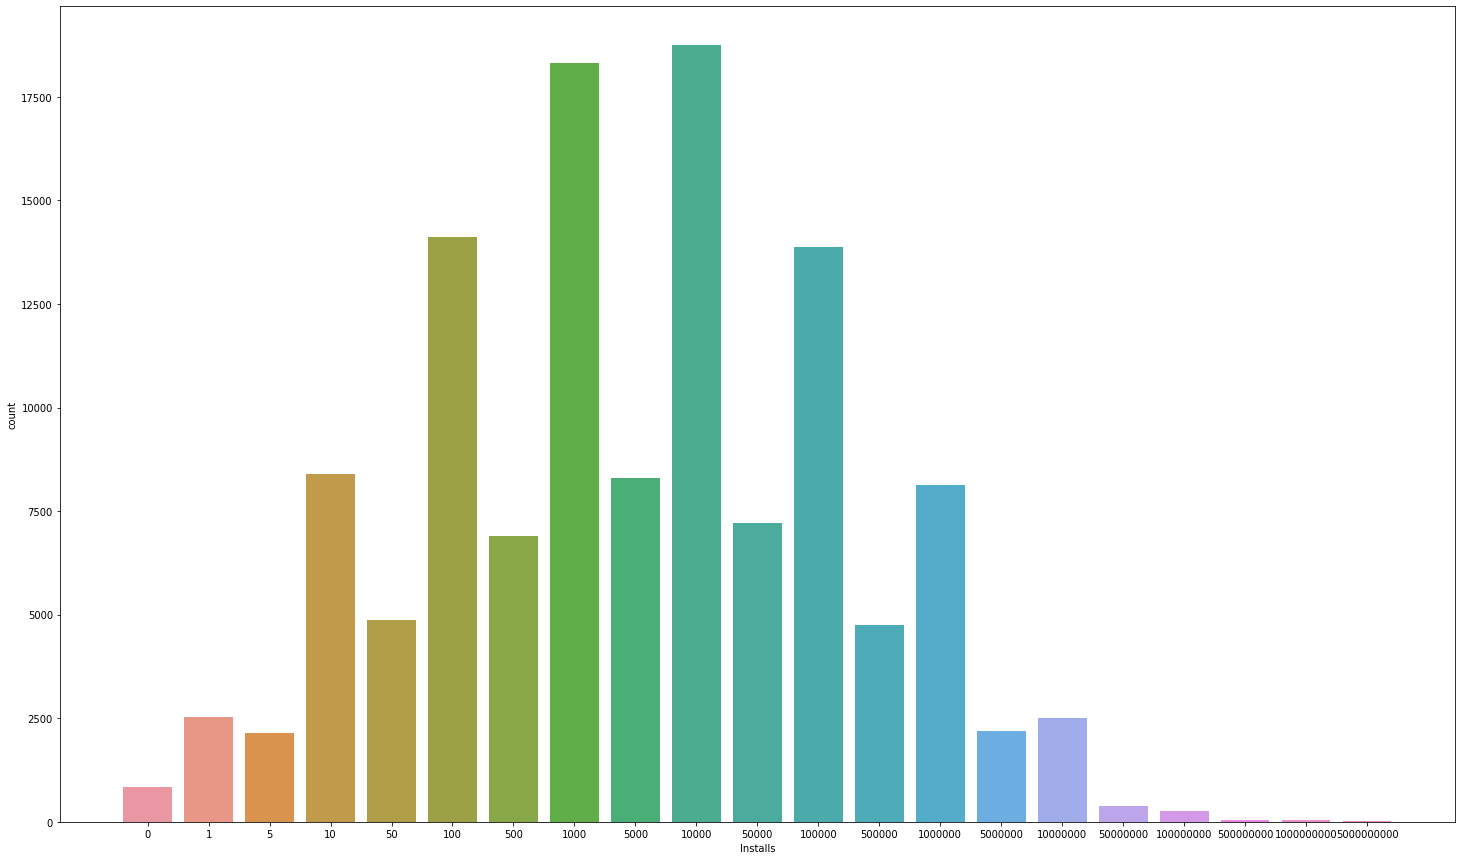

In [11]:
plt.figure(figsize=(25,15))
sns.countplot(playstore['Installs'])
plt.plot()

### Size of App

In [10]:
def define_size(data):
    data=data.replace(',','')
    num=data[:-1]
    if data[-1]=='K' or data[-1]=='k' :
        return float(num)
    elif data[-1]=='M' or data[-1]=='m':
        return float(num)*1000
    elif data[-1]=='G' or data[-1]=='g':
        return float(num)*1000000
    else:
        return 1000

In [11]:
playstore['Size']=playstore['Size'].apply(define_size)

Text(0, 0.5, 'Apps Count')

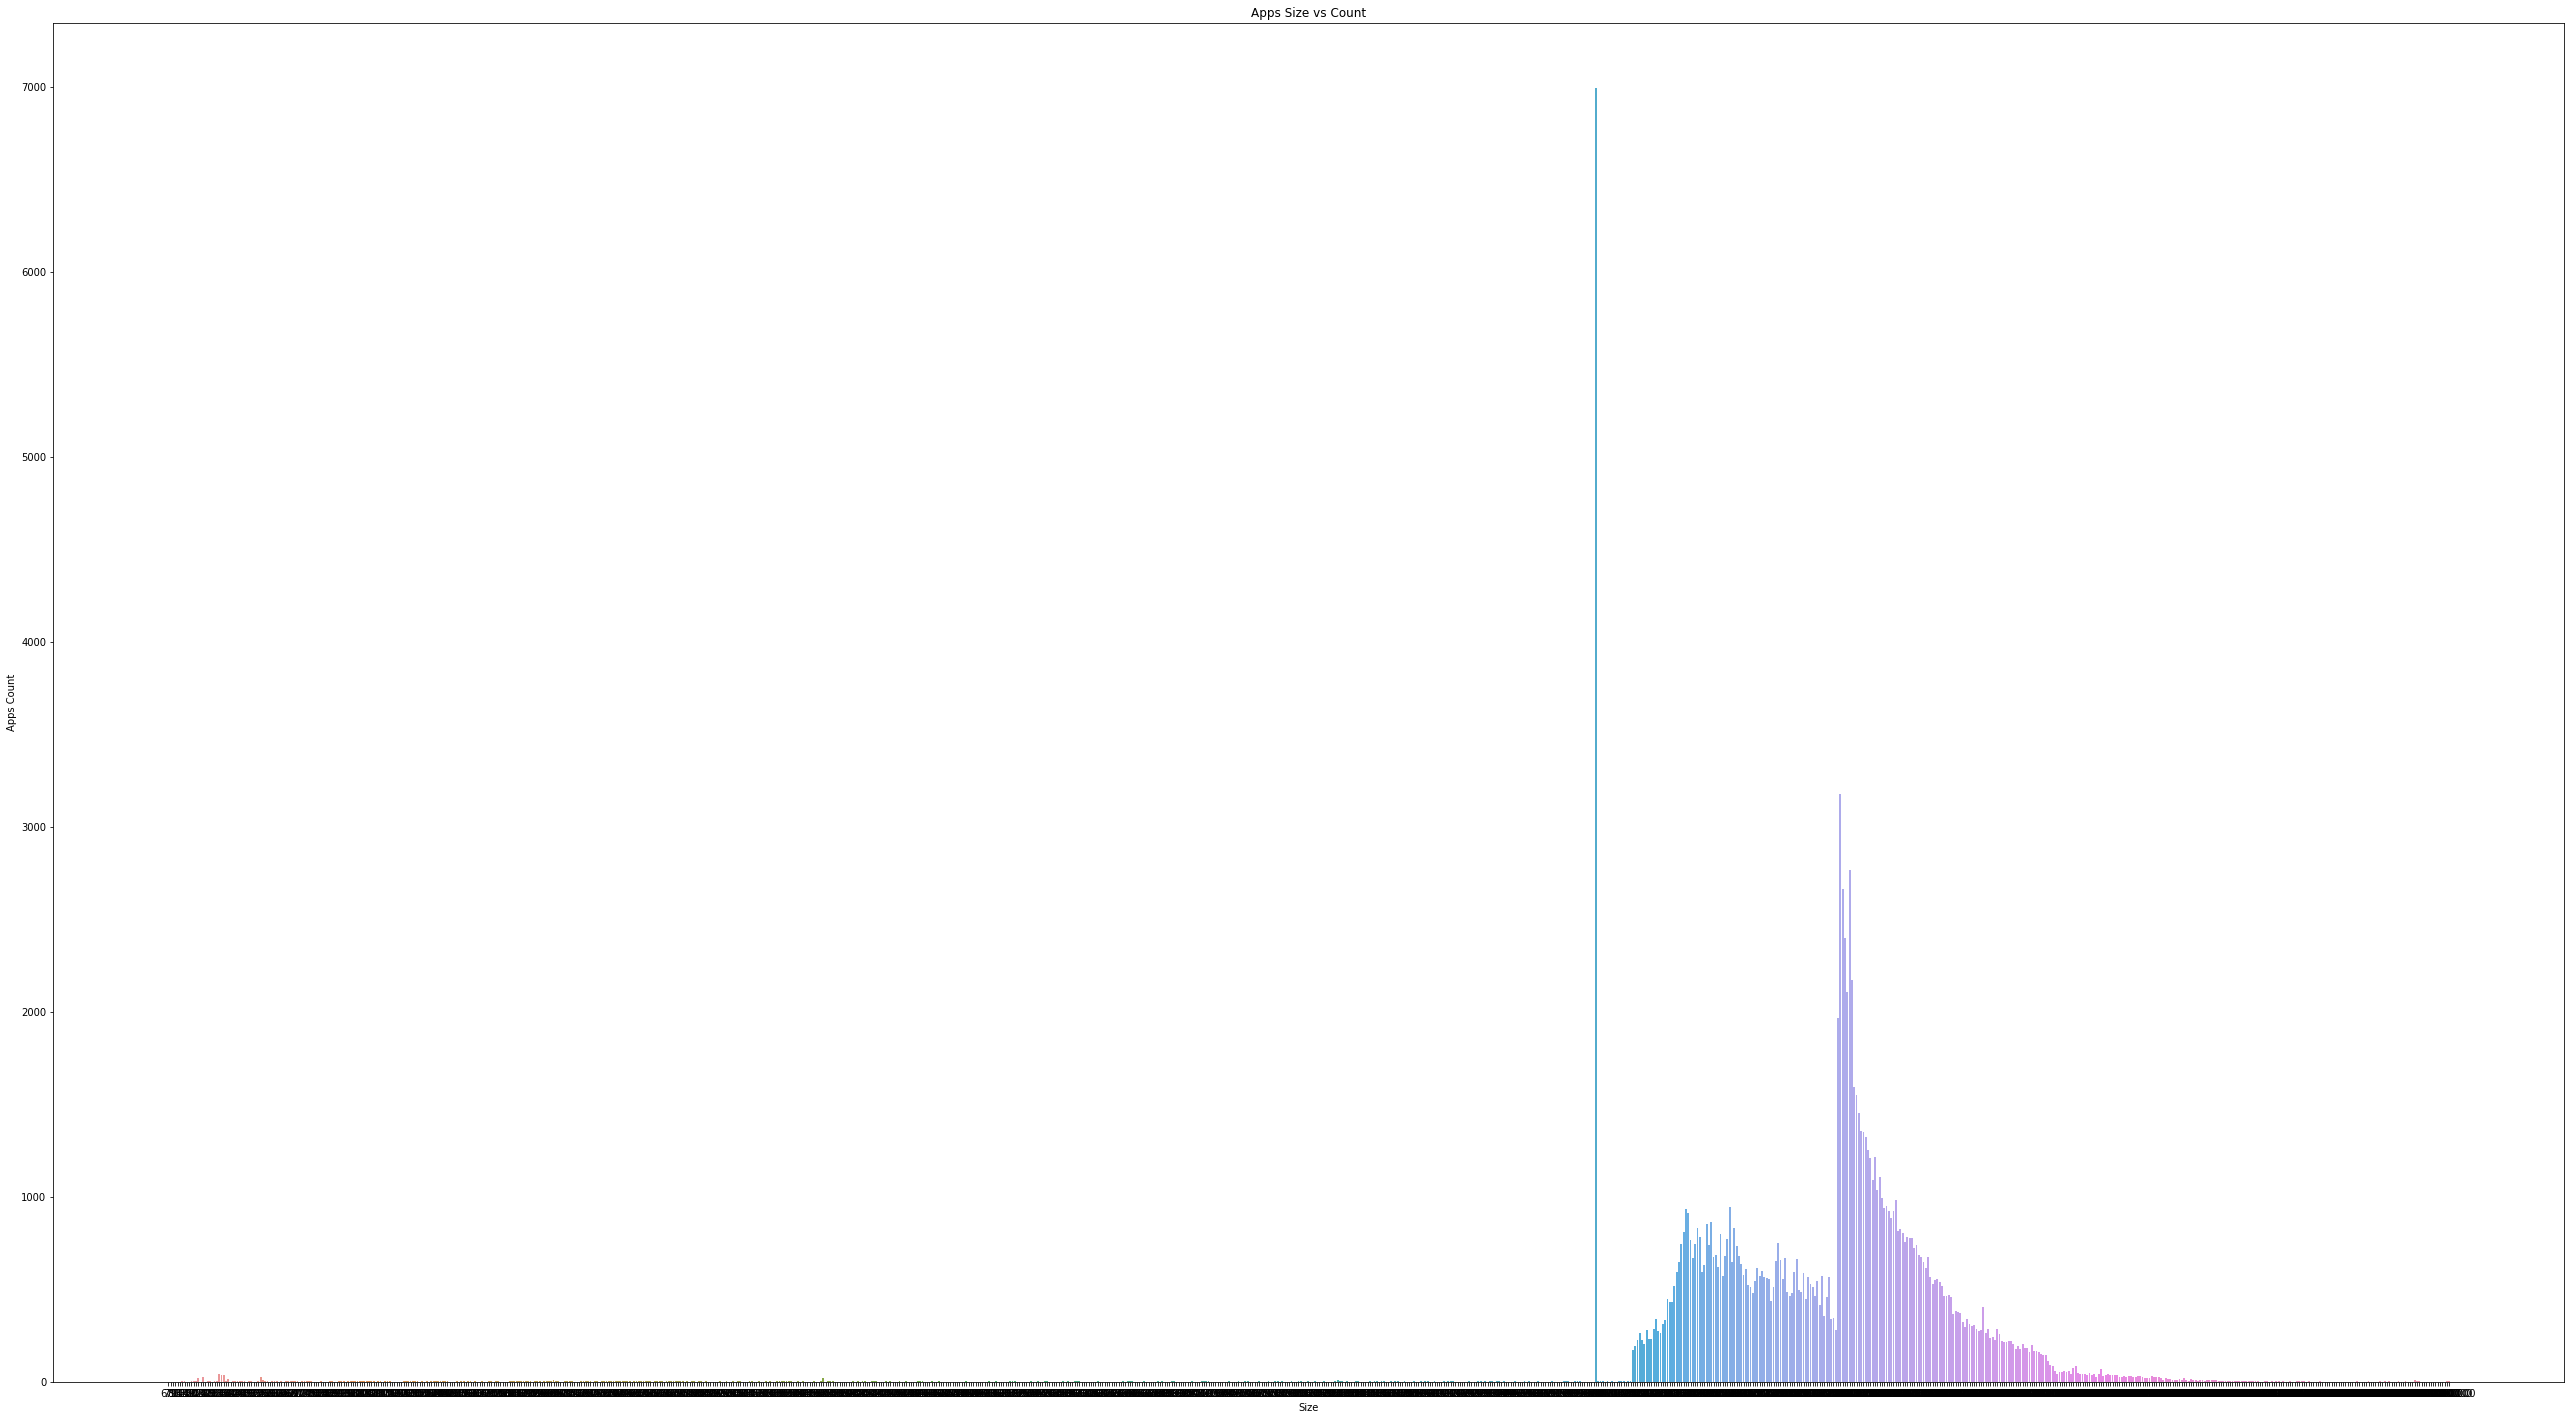

In [12]:
plt.figure(figsize=(45,25))
sns.countplot(playstore['Size'])
plt.plot()
plt.title("Apps Size vs Count")
plt.xlabel("Size")
plt.ylabel("Apps Count")

#### App Size vs Installs

[]

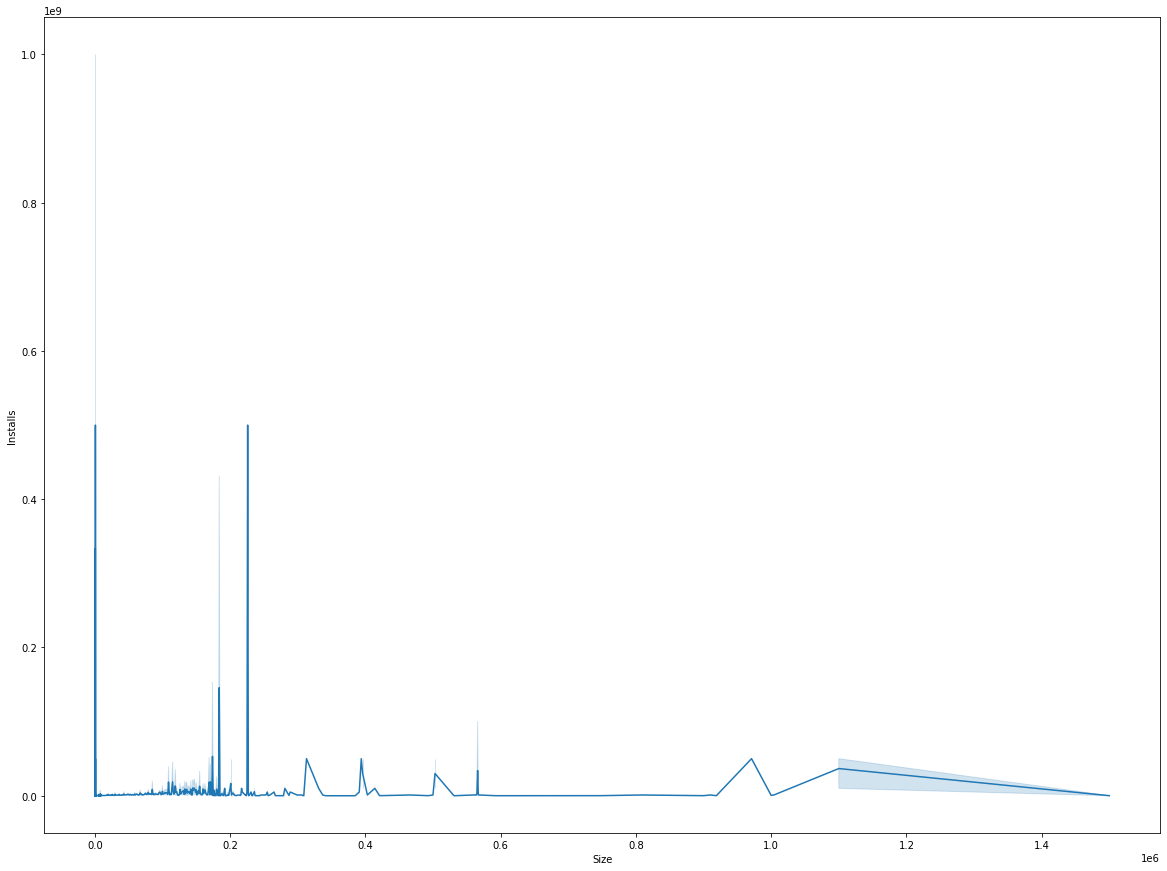

In [14]:
plt.figure(figsize=(20,15))
sns.lineplot(playstore['Size'],playstore['Installs'])
plt.plot()

#### Categories Of App

In [15]:
playstore['Category'].value_counts()

Education                  13554
Music & Audio               9666
Personalization             9417
Books & Reference           7427
Puzzle                      6862
Tools                       6289
Entertainment               5508
Casual                      5095
Simulation                  4806
Arcade                      3830
Action                      3370
Lifestyle                   3353
Educational                 2980
Sports                      2853
Adventure                   2646
Travel & Local              2599
Productivity                2386
Health & Fitness            2331
News & Magazines            2195
Business                    2042
Role Playing                1970
Racing                      1810
Board                       1659
Photography                 1483
Card                        1455
Communication               1422
Strategy                    1377
Food & Drink                1332
Word                        1291
Social                      1275
Shopping  

[]

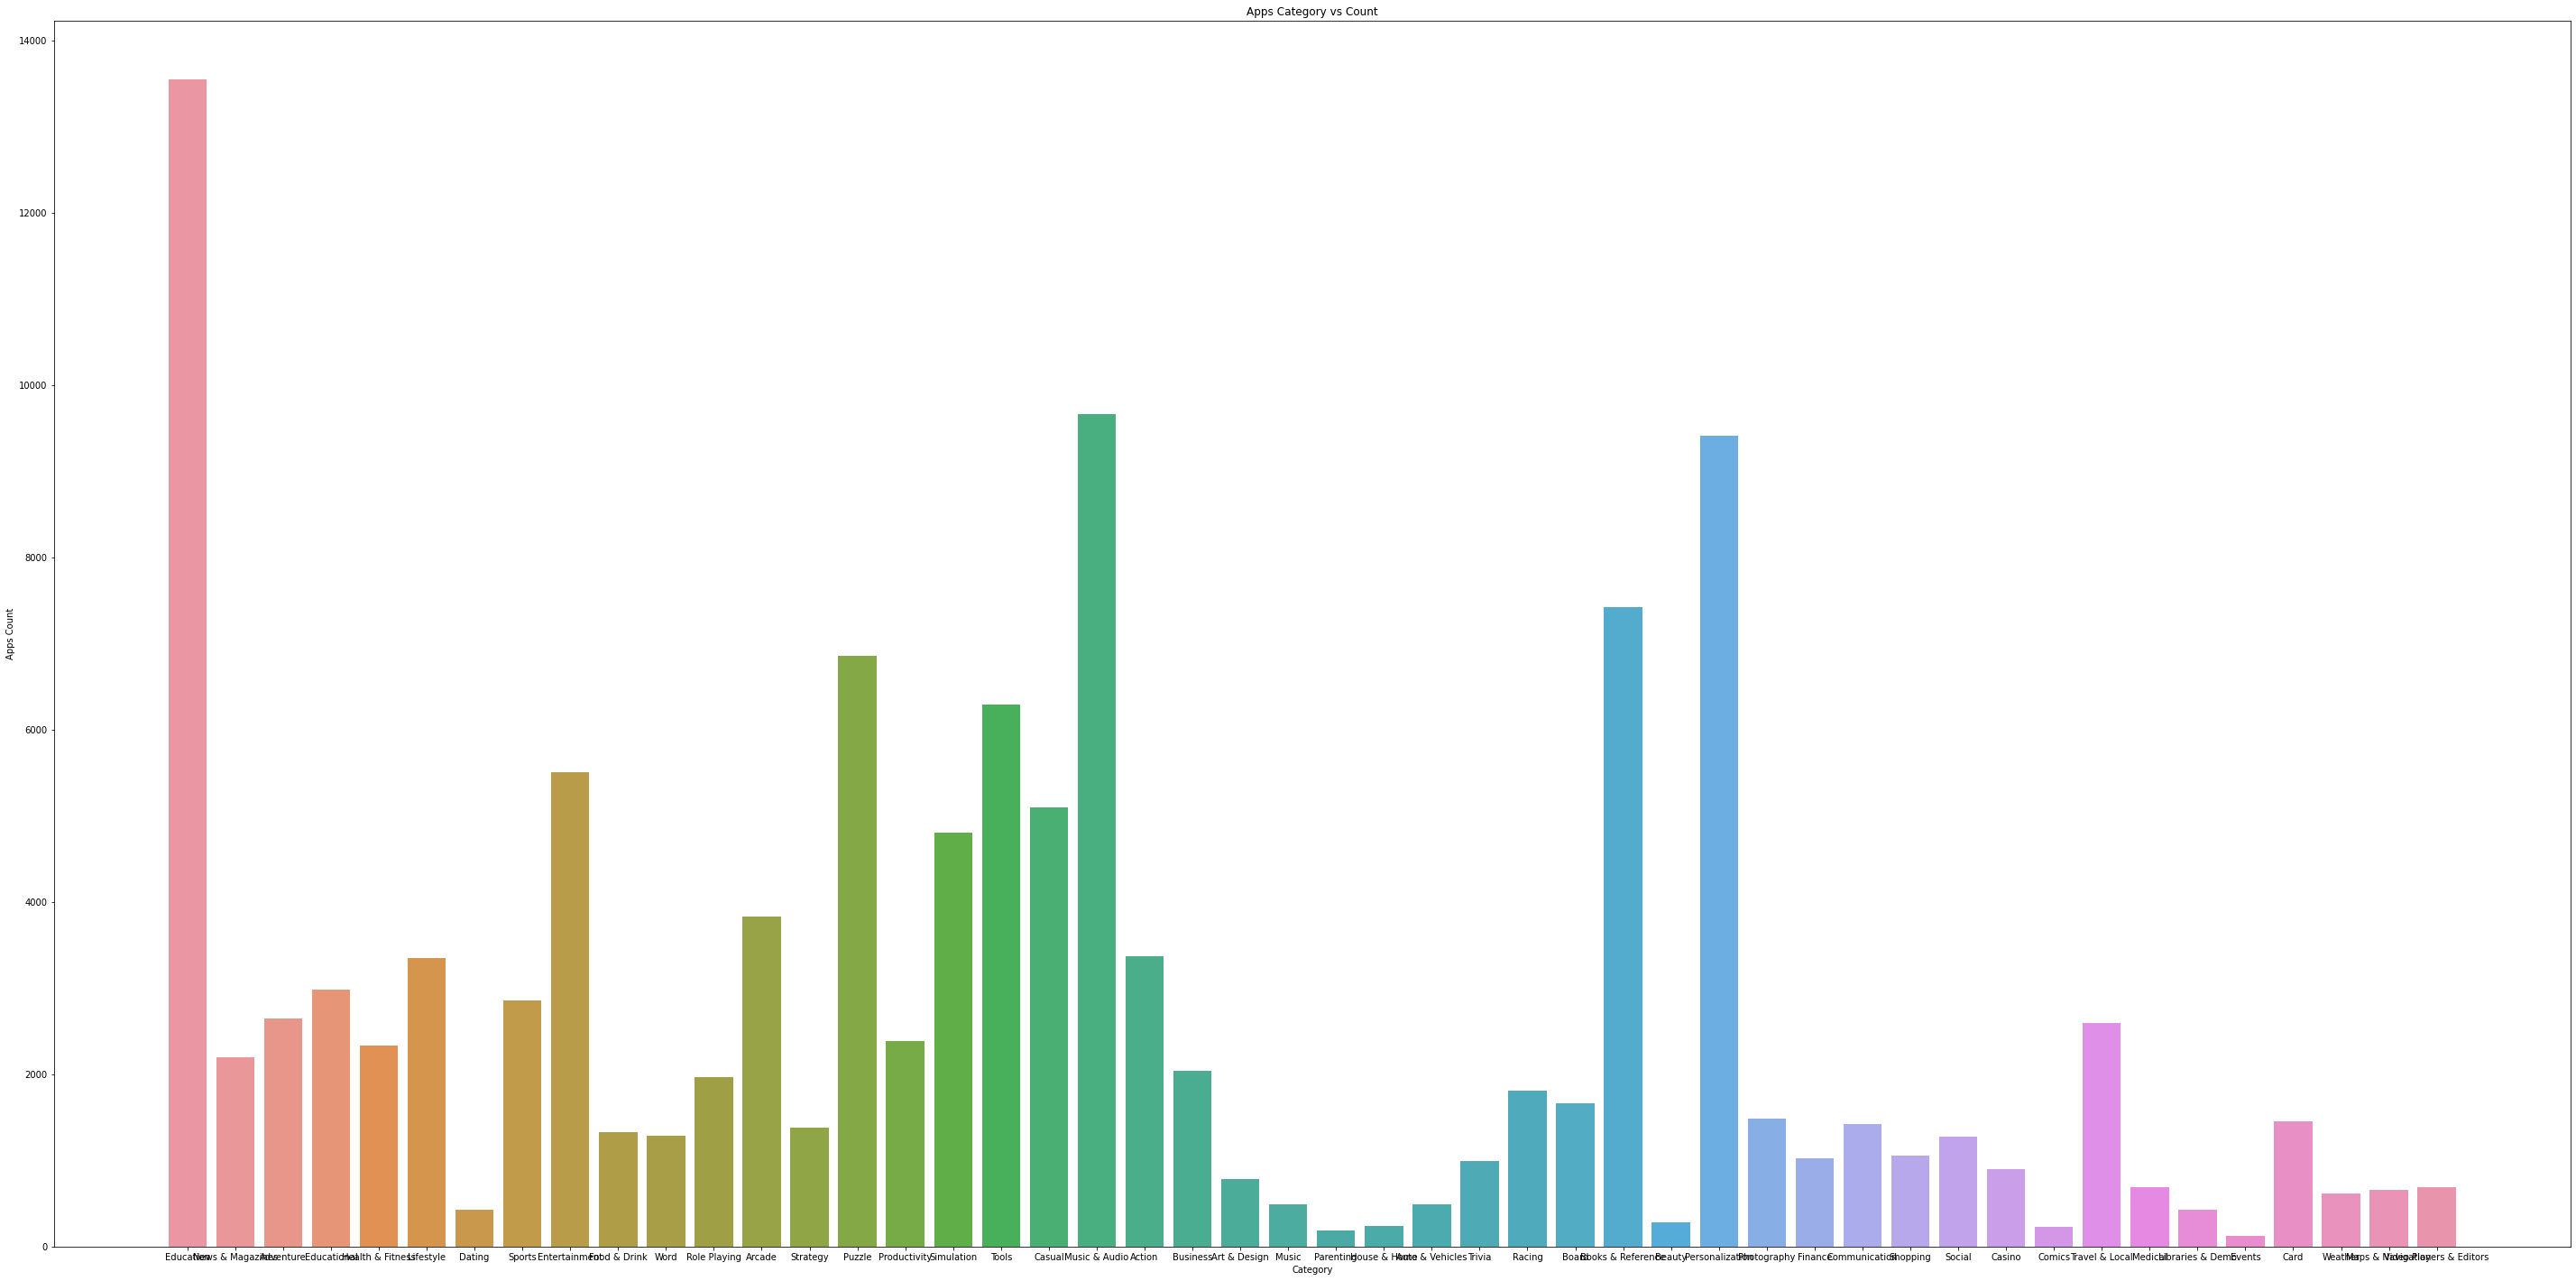

In [16]:
plt.figure(figsize=(50,25))
sns.countplot(playstore['Category'])
plt.title("Apps Category vs Count")
plt.xlabel("Category")
plt.ylabel("Apps Count")
plt.plot()

## Free vs Paid

In [17]:
playstore.Free.value_counts()

True     115783
False      8805
Name: Free, dtype: int64

[]

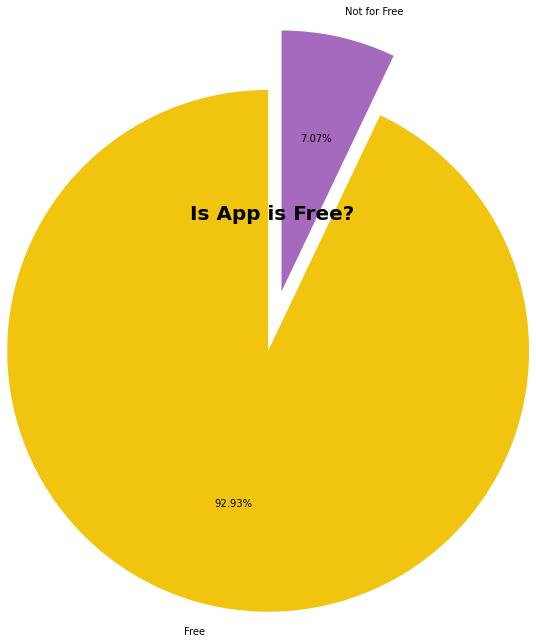

In [20]:
plt.pie(playstore.Free.value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['#F1C40F','#A569BD'],labels=['Free','Not for Free'],
        startangle=90)
plt.title('Is App is Free?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [35]:
playstore['Free'].value_counts()

True     115783
False      8805
Name: Free, dtype: int64

<AxesSubplot:xlabel='Free', ylabel='Rating'>

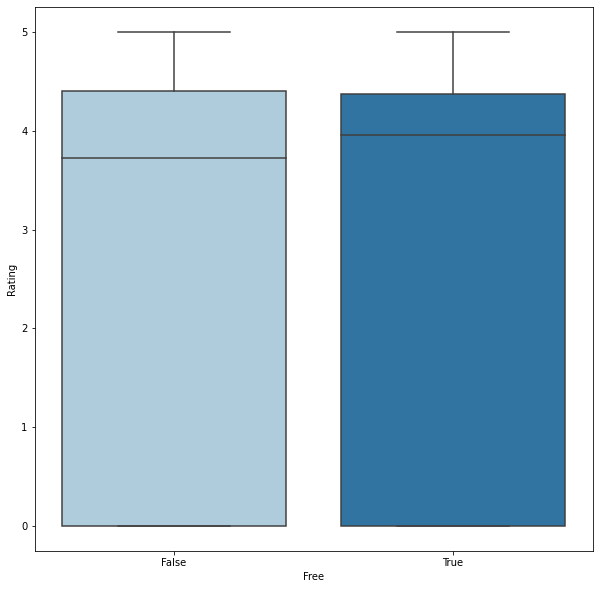

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Free', y='Rating', data=playstore, palette='Paired')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'News & Magazines'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Educational'),
  Text(4, 0, 'Health & Fitness'),
  Text(5, 0, 'Lifestyle'),
  Text(6, 0, 'Dating'),
  Text(7, 0, 'Sports'),
  Text(8, 0, 'Entertainment'),
  Text(9, 0, 'Food & Drink'),
  Text(10, 0, 'Word'),
  Text(11, 0, 'Role Playing'),
  Text(12, 0, 'Arcade'),
  Text(13, 0, 'Strategy'),
  Text(14, 0, 'Puzzle'),
  Text(15, 0, 'Productivity'),
  Text(16, 0, 'Simulation'),
  Text(17, 0, 'Tools'),
  Text(18, 0, 'Casual'),
  Text(19, 0, 'Music & Audio'),
  Text(20, 0, 'Action'),
  Text(21, 0, 'Business'),
  Text(22, 0, 'Art & Design'),
  Text(23, 0, 'Music'),
  Text(24, 0, 'Parenting'),
  Text(25, 0, 'House & Home'),
  Text(26, 0, 'Auto & Vehicles'),
  Text(27, 0, 'Trivia')

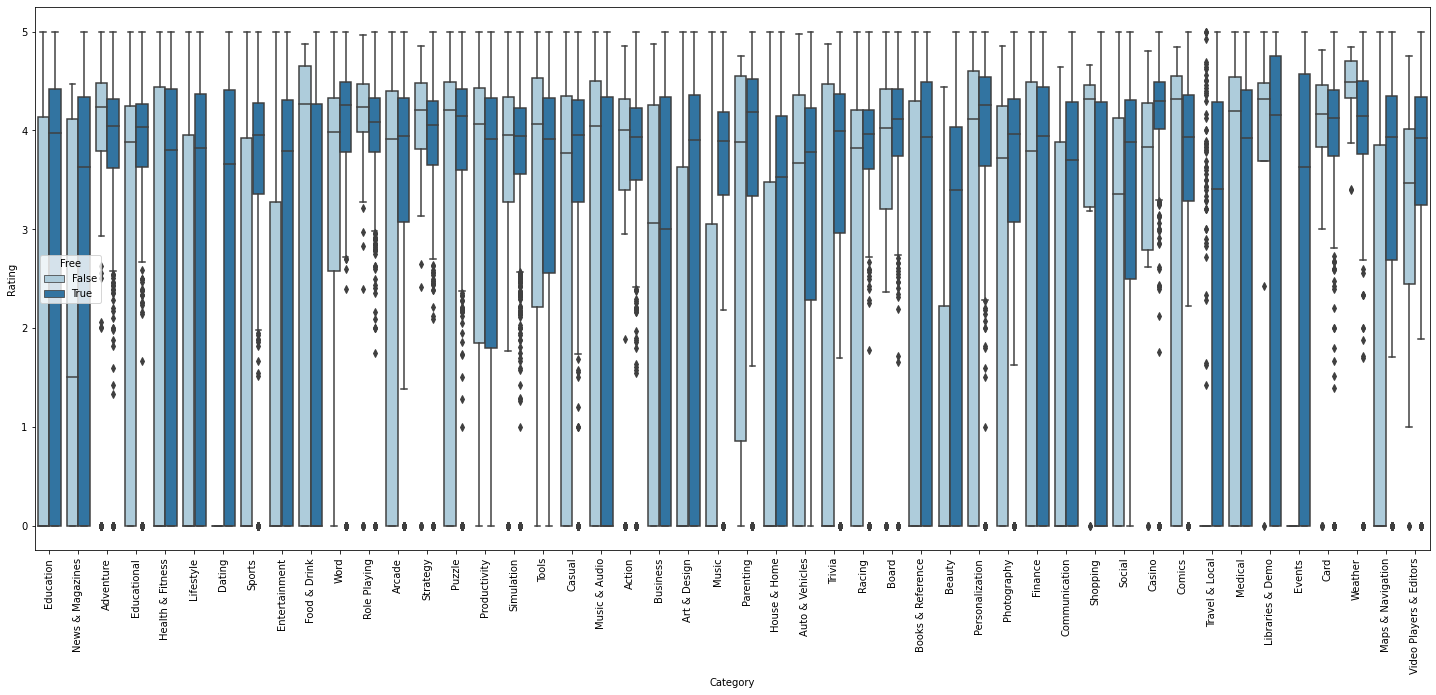

In [40]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Category', y='Rating', data= playstore, hue='Free', palette='Paired')
plt.xticks(rotation=90)

In [41]:
 playstore.groupby(["Category"]).Rating.mean()

Category
Action                     3.480263
Adventure                  3.652474
Arcade                     3.165819
Art & Design               2.762013
Auto & Vehicles            2.998643
Beauty                     2.340232
Board                      3.690807
Books & Reference          2.552173
Business                   2.209816
Card                       3.786562
Casino                     3.960540
Casual                     3.219706
Comics                     3.330350
Communication              2.541603
Dating                     2.725708
Education                  2.689758
Educational                3.368711
Entertainment              2.629058
Events                     2.371671
Finance                    2.787473
Food & Drink               1.942052
Health & Fitness           2.705211
House & Home               2.411305
Libraries & Demo           3.258550
Lifestyle                  2.611876
Maps & Navigation          2.783394
Medical                    2.872475
Music              

Text(0.5, 1.0, 'Average Rating per Category')

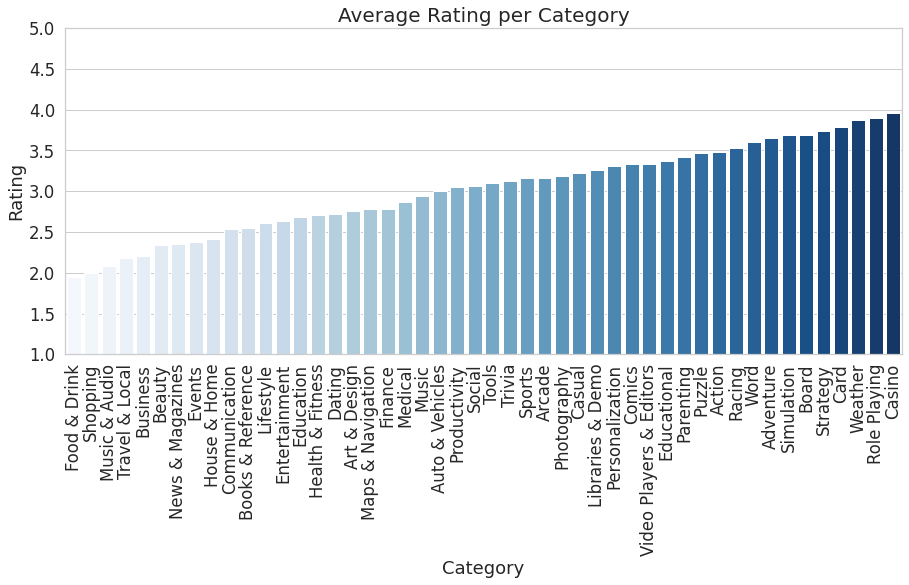

In [25]:
new_df = playstore.groupby("Category").Rating.mean().reset_index() 
sorted_df = new_df.sort_values(by=["Rating"], ascending=True)

sns.set(font_scale=1.5, style="whitegrid")
f, axes = plt.subplots(figsize=(15, 6), sharex=True)

ax = sns.barplot(x="Category", y="Rating", data=sorted_df, palette="Blues") 
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(ylim=(1,5))
plt.title("Average Rating per Category", size=20)


In [42]:
freeapps = playstore[(playstore['Free']==True)]
freeapps_avg = freeapps.groupby(['Category'])['Rating'].mean().reset_index()

paidapps = playstore[(playstore['Free']==False)]
paidapps_avg = paidapps.groupby(['Category'])['Rating'].mean().reset_index()

df_types_avg =  freeapps_avg.merge(paidapps_avg, left_on='Category', right_on='Category', suffixes=(' free', ' paid'))

df_types_avg['difference'] = df_types_avg['Rating paid']-df_types_avg['Rating free']
df_types_avg

,Category,Rating free,Rating paid,difference
0,Action,3.488193,3.357198,-0.130994
1,Adventure,3.635374,3.755715,0.120341
2,Arcade,3.175874,2.960717,-0.215157
3,Art & Design,2.870342,1.353737,-1.516605
4,Auto & Vehicles,3.017316,2.750952,-0.266364
5,Beauty,2.349482,1.480000,-0.869482
6,Board,3.722675,3.360560,-0.362115
7,Books & Reference,2.578412,2.026341,-0.552072
8,Business,2.206845,2.264613,0.057768
9,Card,3.787234,3.775012,-0.012222


Text(0.5, 1.0, 'Difference of Ratings Between Paid and Free Apps Across App Categories')

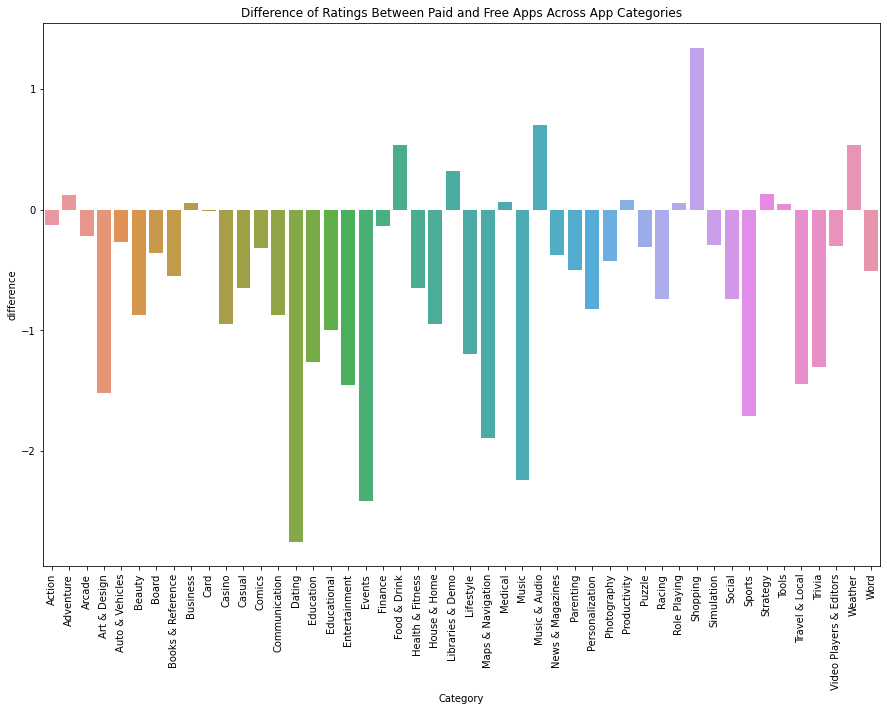

In [43]:
f, ax = plt.subplots(figsize = (15,10))
sns.barplot(x='Category', y='difference', data=df_types_avg)
plt.xticks(rotation=90)
plt.title("Difference of Ratings Between Paid and Free Apps Across App Categories")

### Is App is In Purchases?

In [30]:
playstore['In app purchases'].value_counts()

False    89091
True     35497
Name: In app purchases, dtype: int64

[]

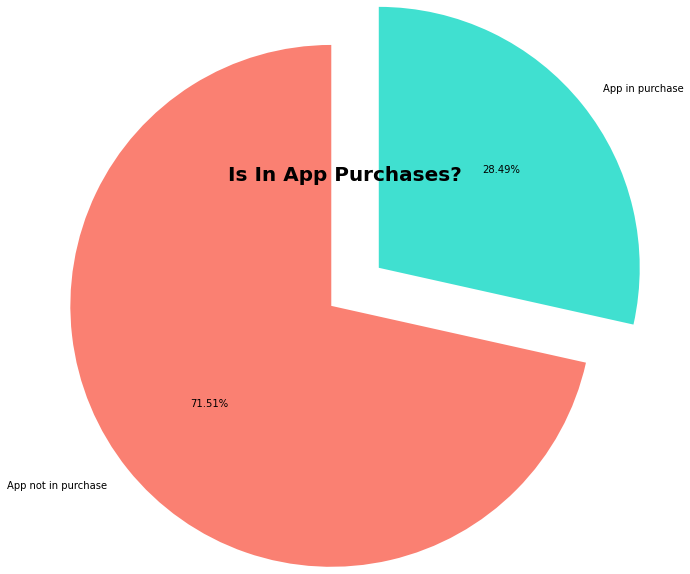

In [32]:
plt.pie(playstore['In app purchases'].value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['#FA8072','#40E0D0'],labels=['App not in purchase','App in purchase'],
        startangle=90)
plt.title('Is In App Purchases?',fontdict={'size':20,'weight':'bold'})
plt.plot()

### Is there a relation between the Android Update Dates of all the Apps?

In [12]:
playstore['new'] = pd.to_datetime(playstore['Last update'])
playstore.drop(labels = ['Last update'], axis = 1, inplace = True)
playstore.rename(columns={'new': 'Last update'}, inplace=True)

Text(0.5, 1.0, 'Time series plot of Last Updates')

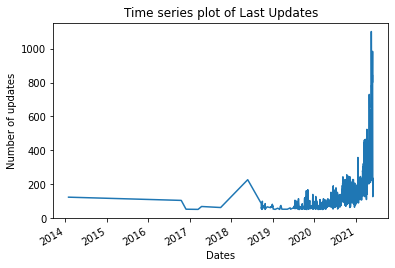

In [13]:
freq= pd.Series()
freq=playstore['Last update'].value_counts()
newfreq=freq[freq>50]
newfreq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

### Which are the best Apps on App Store?

### The criteria I have selected are:
    High rating
    Large number of reviews
    Large number of installs
###### I haven't taken Price as a parameter for this selection because I believe an expensive app can be perceived to be better than a similar free app if it has high rating,reviews and installs.

###### I think features like Content Rating, Android Version, Last Update time, Size of the App, Current version of the App are irrelevant in this selection as well for obvious reasons.

In [16]:
playstore['Rating'] = playstore['Rating'].apply(lambda x: float(x))
playstore['Reviews'] = playstore['Reviews'].apply(lambda x: int(x))

newdf_rate=playstore[['App Name','Rating','Category','Content Rating']].groupby(['Rating'], sort = True)
newdf_rate=newdf_rate.filter(lambda x: x['Rating'].mean() >= 4.5)
newdf_rate=newdf_rate.sort_values(by=['Rating'])

newdf_reviews=playstore[['App Name','Reviews']].groupby(['Reviews'], sort = True)
newdf_reviews=newdf_reviews.filter(lambda x: x['Reviews'].mean() >= 255435)
newdf_reviews=newdf_reviews.sort_values(by=['Reviews'])

newdf_installs=playstore[['App Name','Installs']].groupby(['Installs'], sort = True)
newdf_installs=newdf_installs.filter(lambda x: x['Installs'].mean() >= 10000000)
newdf_installs=newdf_installs.sort_values(by=['Installs'])

s1 = pd.merge(newdf_reviews, newdf_rate, how='inner', on=['App Name'])
s2 = pd.merge(s1, newdf_installs, how='inner', on=['App Name'])
s2

,App Name,Reviews,Rating,Category,Content Rating,Installs
0,ESET Mobile Security & Antivirus,257519,4.765739,Tools,Everyone,10000000
1,The Walking Zombie 2: Zombie shooter,259164,4.511112,Action,Teen,10000000
2,VN Video Editor Maker VlogNow,264703,4.559095,Video Players & Editors,Teen,10000000
3,Diamond Digger Saga,264978,4.540091,Casual,Everyone,10000000
4,Solitaire Grand Harvest,266253,4.590045,Card,Everyone,10000000
...,...,...,...,...,...,...
260,Bowmasters,2580934,4.541592,Action,Teen,100000000
261,Gboard - the Google Keyboard,2888221,4.511695,Tools,Everyone,1000000000
262,Dragon City Mobile,3614553,4.576524,Simulation,Everyone,100000000
263,Shadow Fight 2,5251462,4.572542,Action,Everyone 10+,100000000


### Which Category has more likeable Apps?

Text(0.5, 1.0, 'CATEGORIES OF MOST LIKEABLE APPS ON THE ANDROID APP STORE')

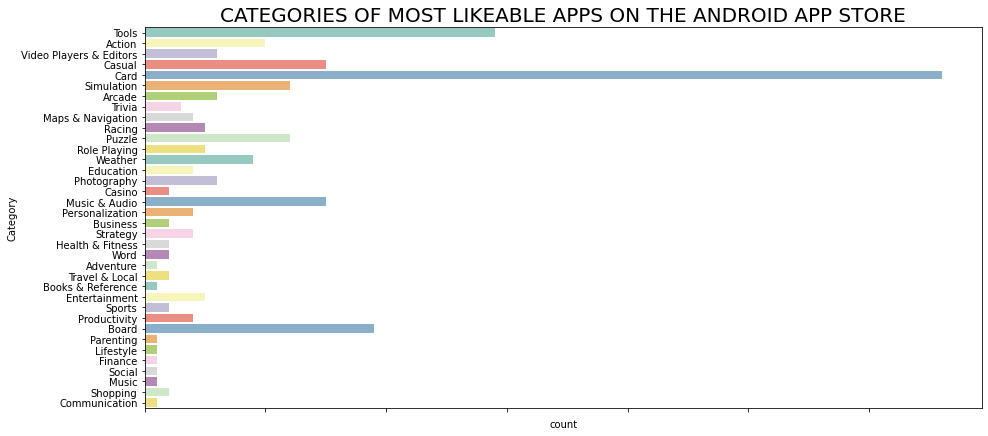

In [20]:
rcParams['figure.figsize'] = 15,7
likeable_apps = sns.countplot(y="Category",data=s2, palette = "Set3")
likeable_apps.set_xticklabels(likeable_apps.get_xticklabels(), rotation=90, ha="right")
likeable_apps 
plt.title('CATEGORIES OF MOST LIKEABLE APPS ON THE ANDROID APP STORE',size = 20)

### Which Category addresses which audience ?

In [27]:
print(len(playstore.Category.unique()))
print(playstore.Category.unique())
print(playstore["Content Rating"].unique())

48
['Education' 'News & Magazines' 'Adventure' 'Educational'
 'Health & Fitness' 'Lifestyle' 'Dating' 'Sports' 'Entertainment'
 'Food & Drink' 'Word' 'Role Playing' 'Arcade' 'Strategy' 'Puzzle'
 'Productivity' 'Simulation' 'Tools' 'Casual' 'Music & Audio' 'Action'
 'Business' 'Art & Design' 'Music' 'Parenting' 'House & Home'
 'Auto & Vehicles' 'Trivia' 'Racing' 'Board' 'Books & Reference' 'Beauty'
 'Personalization' 'Photography' 'Finance' 'Communication' 'Shopping'
 'Social' 'Casino' 'Comics' 'Travel & Local' 'Medical' 'Libraries & Demo'
 'Events' 'Card' 'Weather' 'Maps & Navigation' 'Video Players & Editors']
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Unrated' 'Adults only 18+']


In [28]:
playstore["Main_genre"] = playstore.Category.apply(lambda x: x.split(";")[0])
playstore["Sub_genre"] = playstore.Category.apply(lambda x: x.split(";")[1] if x.find(";")>0 else "NA")
playstore["Content Rating"] =playstore["Content Rating"].replace(to_replace = 'Unrated', value='Everyone', regex=True)

Text(0.5, 1.0, 'Genre and Content Rating')

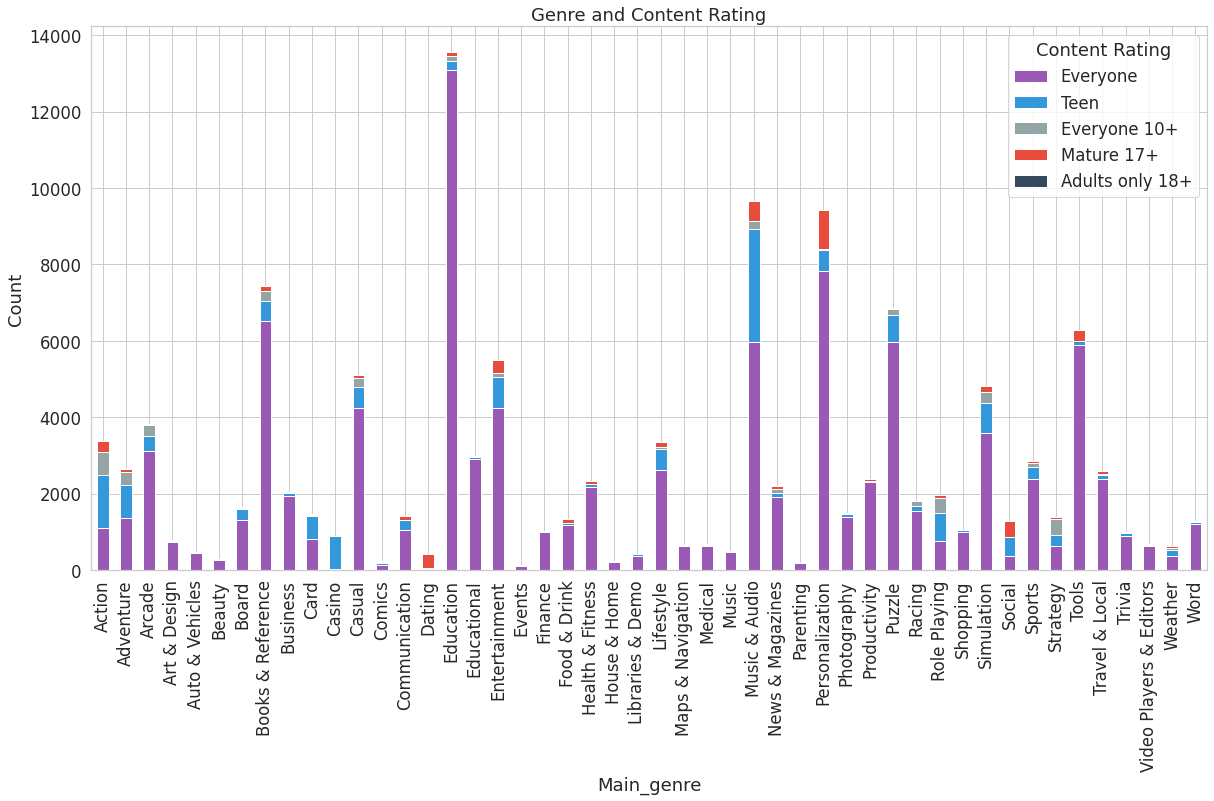

In [30]:
playstore_by_main_genre = playstore.groupby(["Main_genre", "Content Rating"]).count().reset_index().sort_values(
    by=["App Name"], ascending=False).reset_index()
playstore_by_main_genre= playstore_by_main_genre[["Main_genre", "Content Rating", "App Name"]]
playstore_pivoted = playstore_by_main_genre.pivot(columns="Content Rating", index="Main_genre", values="App Name")
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
playstore_pivoted.loc[:,playstore["Content Rating"].unique()].plot.bar(stacked=True, color=colors, figsize=(20,10))
plt.ylabel("Count")
plt.title("Genre and Content Rating")